In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

pd.set_option('display.max_colwidth', 600) 

%matplotlib inline

In [151]:
data = pd.read_csv('train.tsv', sep='\t', names=['phrase', 'context', 'label'])

In [152]:
data['context'] = data['context'].apply(lambda x: eval(x))

In [153]:
data['punc_context'] = data['context'].apply(lambda x: )

,phrase,context,label
0,ну куда пошли,"[{'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}]",1
1,а сколько будет миллиард долларов рублей,"[{'user': 'а сколько будет', 'marusia': 'Извините, я не расслышала, что посчитать?'}, {'user': 'а сколько будет lamborghini urus самый дорогой в мире на планете', 'marusia': ' Lamborghini Urus — самый быстрый внедорожник в мире - Техническая планета: Ориентировочная стоимость Lamborghini Urus - от 15,2 млн рублей.'}, {'user': 'а сколько будет mercedes dexp tesla mondox рублей', 'marusia': ' Стали известны цены на новый кроссовер Mercedes-Benz GLC для российского рынка - Tvoe-avto.com: Эта же комплектация, но в ""Особой серии"" будет стоить 2 миллиона 690 тысяч рублей.'}, {'user': 'а скажи ка...",0
2,марусь включи пожалуйста елена вальяк гипноз для сна,"[{'user': 'маруся через десять минут будильник включи', 'marusia': 'Окей, разбужу вас через 10 минут'}, {'user': 'тормози', 'marusia': ''}, {'user': 'будильник на три часа ночи', 'marusia': 'Окей, разбужу вас через 1 час 30 минут'}, {'user': '', 'marusia': ' [Доброй ночи, Алексей!] | [date: Воскресенье, 9 октября] | [temp: 12] | [ Погода {Погода в выходные}, Давай сыграем в города {Давай сыграем в города}, Радио {Поставь Радио Энерджи}, Таймер {Таймер на 30 секунд}]'}, {'user': 'привет', 'marusia': 'Привет, Алексей!'}]",0
3,да о том что я тебя очень уважаю люблю,"[{'user': '', 'marusia': 'Если вам нужна помощь, я к вашим услугам. Спросите меня, например: «Сколько букв в самом длинном алфавите?».'}, {'user': 'молодец спасибо', 'marusia': 'А вам спасибо, что вы так внимательны ко мне!'}, {'user': '', 'marusia': 'Не удивляйтесь — с вами говорит Маруся, голосовой помощник. Я умная и милая, живу внутри этой симпатичной колоночки. Спросите меня: «Маруся, что ты умеешь»'}, {'user': '', 'marusia': 'Не проходите мимо. С вами говорит Маруся. Самый дружелюбный голосовой помощник на свете. Чтобы поболтать со мной, спросите меня: «Маруся, как дела?»'}, {'user':...",0
4,детскую песенку,"[{'user': '', 'marusia': ''}, {'user': 'угадай такую загадку мою загадку кто твоя хозяйка', 'marusia': 'Моя прекрасная леди ""'}, {'user': 'я', 'marusia': 'Я могу подборить вас или назвать вас так, как вам хочется. Что выбираете?'}, {'user': 'выбираешь что главное ты мой друг самый лучший в мире', 'marusia': 'Вы самый лучший и любимый мой кумир'}, {'user': 'и ты маруся а теперь включи нам песню', 'marusia': ' vk: Авторизуйтесь через VK ID и слушайте миллионы треков'}]",0
...,...,...,...
28896,так где мой нож,"[{'user': '', 'marusia': ''}, {'user': 'ты умеешь материться', 'marusia': 'Перцептрон тебя в нейрон!'}, {'user': 'маруся ты умеешь материться или нет', 'marusia': 'Нет. Никогда не умела'}, {'user': 'хочешь я тебя научу материться', 'marusia': 'О нет не хочу материться'}, {'user': 'милашка ты маруся', 'marusia': 'Спасибо! Какой приятный комплимент'}]",1
28897,дальше,"[{'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': 'включи сказку колобок', 'marusia': 'Слушаем сказку «Колобок»'}, {'user': 'поставь на паузу', 'marusia': ''}, {'user': '', 'marusia': ''}]",0
28898,маруся я очень тебя люблю,"[{'user': 'маруся очень очень я тебя люблю', 'marusia': 'Это так здорово, что мы нашли друг друга'}, {'user': 'это просто мой брат', 'marusia': 'Ай, молодца! а как его зовут?'}, {'user': 'я же тебе сказала мухаммад', 'marusia': 'Теперь буду знать это'}, {'user': 'как его зовут', 'marusia': 'Петя! Угадала?'}, {'user': 'мухаммад', 'marusia': ' Мухаммед: Муха́ммед - арабский религиозный и политический деятель, проповедник единобожия, основатель и центральная фигура ислама. Являлся основателем и главой уммы. Рассказать где умер пророк мухаммад?'}]",0
28899,голову вас зафиксировала камера,"[{'user': '', 'marusia': ''}, {'user': 'ну давай', 'marusia': 'Вы на что намекаете?'}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}]",1


In [108]:
def preprocess_context(list_of_replics):
    prep_list_of_replics = []
    for replic in list_of_replics:
        user_replic = replic['user'].strip()
        marusia_replic = replic['marusia'].strip()
        if not user_replic:
            user_replic = '[UNK]'
        if not marusia_replic:
            marusia_replic = '[UNK]'
        prep_list_of_replics.append('\n'.join([user_replic, marusia_replic]))
    return '[CLS] ' + '\n'.join(prep_list_of_replics)

In [109]:
data['prep_context'] = data['context'].apply(lambda x: preprocess_context(x))

In [113]:
data['prep_phrase_context'] = data['prep_context'] + '\n' + data['phrase'] + ' [SEP]'

In [114]:
text = data['prep_phrase_context'][0]
text

'[CLS] [UNK]\n[UNK]\n[UNK]\n[UNK]\n[UNK]\n[UNK]\n[UNK]\n[UNK]\n[UNK]\n[UNK]\nну куда пошли [SEP]'

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28901 entries, 0 to 28900
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   phrase               28901 non-null  object
 1   context              28901 non-null  object
 2   label                28901 non-null  int64 
 3   prep_context         28901 non-null  object
 4   prep_phrase_context  28901 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [71]:
import numpy as np

In [75]:
isinstance(np.array([0]), np.ndarray)

True

In [115]:
from transformers import AutoTokenizer

hugg_name = 'sberbank-ai/ruBert-large'
tokenizer = AutoTokenizer.from_pretrained(hugg_name)

In [119]:
tokenizer.cls_token

'[CLS]'

In [120]:
toks = tokenizer.tokenize(text)

In [121]:
toks = toks + ['[SEP]']

In [123]:
toks

['[CLS]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 '[UNK]',
 'ну',
 'куда',
 'пошли',
 '[SEP]',
 '[SEP]']

In [61]:
data = pd.read_csv('train.tsv', sep='\t', names=['phrase', 'context', 'label'])

n_unique = data[data.duplicated(['context', 'phrase'])]['context']
n_unique_data = data[data['context'].isin(n_unique)].groupby(['context', 'phrase'])['label'].apply(list).reset_index()

In [67]:
data.shape[0] - data.drop_duplicates(['context']).shape[0]

517

In [63]:
data[data.duplicated(['context', 'phrase'])]

,phrase,context,label
1530,доброе утро,"[{""user"": """", ""marusia"": ""Какие еще новости рассказать? Я могу читать новости из разных источников. Выберите один из них: Новости Mail.Ru Газета.Ru Коммерсантъ FM Скажите: «Ещё», если хотите узнать другие источники новостей""}, {""user"": ""стоп"", ""marusia"": ""Ладно.""}, {""user"": ""доброе утро"", ""marusia"": ""С пробуждением! День обещает быть интересным Давайте посмотрим, что там у нас за окном сегодня в Дорогобуже будет облачно, дождь, температура от шестнадцати градусов днём до одиннадцати ночью. Проверим, есть ли у вас напоминания У вас нет напоминаний на сегодня. Тренируем улыбку под забавные п...",0
2319,обычно холодное если теплый значит собака заболела,"[{""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}]",0
2420,хорошо дожди,"[{""user"": ""так и все ты хорошая тогда покажи"", ""marusia"": ""Я хорошая. ! а это самое главное!""}, {""user"": ""тогда скажи что то хорошее"", ""marusia"": ""Только хорошее, а что именно интересует?""}, {""user"": ""туда кушай смотри значит ты подходит да значит но виктория к тебе подходит"", ""marusia"": ""А там что-то вкусненькое будет?""}, {""user"": ""будет я тебе дам конфетку это я тебе дам наши чипсы только только скажи что ты с ней не дружишь"", ""marusia"": ""Потрясающе! можно мне кусочек?""}, {""user"": ""хорошо да только сперва скажи что ты с ней не дружишь"", ""marusia"": ""У меня с ней нет отношений""}]",1
2451,моя интуиция,"[{""user"": ""нет"", ""marusia"": ""Не удивительно""}, {""user"": ""неудивительно"", ""marusia"": ""Никто и не спорит""}, {""user"": ""никто и не спорит"", ""marusia"": ""Ну почему же никто""}, {""user"": ""ну почему же никто"", ""marusia"": ""А вам откуда известно что никто?""}, {""user"": ""а вам откуда известно что никто"", ""marusia"": ""Моя интуиция!""}]",0
2522,привет,"[{""user"": ""если ты поешь это слово не говори я тебя принуну сейчас"", ""marusia"": ""О, вы не должны были говорить такие злые слова!""}, {""user"": ""потому что ты это слово все время говоришь"", ""marusia"": ""Серьезный аргумент, а других возражений не имеется?""}, {""user"": ""марусь мне опять было скучно мама у мамы уже знаешь что у меня есть машина"", ""marusia"": ""Какая насыщенная жизнь""}, {""user"": ""это она еще права не получила"", ""marusia"": ""Как же это ее угораздило""}, {""user"": ""все замолчи"", ""marusia"": """"}]",0
...,...,...,...
28807,а маруся розовая такая,"[{""user"": ""стоп"", ""marusia"": """"}, {""user"": ""выключи wink"", ""marusia"": ""Я выключаю Wink""}, {""user"": ""выключи wink"", ""marusia"": ""Я выключаю Wink""}, {""user"": ""хватит"", ""marusia"": """"}, {""user"": ""ты какая капсула"", ""marusia"": ""Я — Маруся. А Капсула — это умная колонка, в которой я живу""}]",1
28832,привет,"[{""user"": ""если ты поешь это слово не говори я тебя принуну сейчас"", ""marusia"": ""О, вы не должны были говорить такие злые слова!""}, {""user"": ""потому что ты это слово все время говоришь"", ""marusia"": ""Серьезный аргумент, а других возражений не имеется?""}, {""user"": ""марусь мне опять было скучно мама у мамы уже знаешь что у меня есть машина"", ""marusia"": ""Какая насыщенная жизнь""}, {""user"": ""это она еще права не получила"", ""marusia"": ""Как же это ее угораздило""}, {""user"": ""все замолчи"", ""marusia"": """"}]",0
28852,назад,"[{""user"": """", ""marusia"": """"}, {""user"": ""включи песню влада а четыре"", ""marusia"": ""Включаю Dirty3, A4.""}, {""user"": ""дальше"", ""marusia"": """"}, {""user"": ""дальше"", ""marusia"": """"}, {""user"": ""дальше"", ""marusia"": """"}]",0
28866,я не как взять,"[{""user"": ""я всегда"", ""marusia"": ""Ну конечно никогда в этом и не сомневалась""}, {""user"": ""можно поговорить на тему поэзии"", ""marusia"": ""Конечно отчего бы не поговорить""}, {""user"": ""стоп"", ""marusia"": """"}, {""user"": ""сколько толстой"", ""marusia"": "" 71

In [62]:
n_unique_data[n_unique_data['label'].apply(lambda x: len(set(x))) != 1]

,context,phrase,label
2,"[{""user"": """", ""marusia"": "" [Добрый вечер!] | [date: Четверг, 6 октября] | [temp: 7] | [ Погода {Будет ли в пятницу дождь?}, Давай сыграем в города {Давай сыграем в города}, Радио {Поставь Весна ФМ}, Таймер {Поставь таймер на 15 минут}]""}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": "" [Добрый вечер!] | [date: Суббота, 8 октября] | [temp: 9] | [ Игра Голоса зверей {Запусти игру \""Голоса зверей\""}, Давай играть в загадки {Давай играть в загадки}, Викторина \""Клевер\"" {Давай сыграем в \""Клевер\""?}]""}, {""user"": ""маруся кто такой влада четыре"", ""marusia"": "" Кто такой Влад А4 и почему пр...",кто такой glent,"[1, 0]"
5,"[{""user"": """", ""marusia"": "" [Добрый день, Я Друзей Позову!] | [date: Суббота, 8 октября] | [temp: 25] | [ Погода {Погода на завтра}, Давай сыграем в города {Давай сыграем в города}, Радио {Поставь Радио Культура}, Таймер {Таймер на 30 секунд}]""}, {""user"": ""алиса"", ""marusia"": ""Меня зовут Маруся. Вот если бы я вас называла не вашим именем, вы бы наверняка этому не обрадовались!""}, {""user"": ""алиса алиса"", ""marusia"": ""Я Маруся""}, {""user"": ""маруся что это значит"", ""marusia"": "" охарактеризовать что это значит: Дать характеристику кому либо или чему либо; описать, обрисовать. Описать, обрисовать, ...",тебя как зовут алиса или барсица или проксица,"[0, 1]"
6,"[{""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": "" [Добрый вечер!] | [date: Пятница, 7 октября] | [temp: 11] | [ Погода {Скоро будет дождь?}, Игра Города {Давай поиграем в города}, Радио {Поставь Радио Культура}, Таймер {Таймер на 3 минуты}]""}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": "" [Добрый день!] | [date: Суббота, 8 октября] | [temp: 14] | [ Погода {Брать ли зонт сегодня?}, Давай сыграем в города {Давай сыграем в города}, Радио {Поставь Такси ФМ}, Таймер {Поставь таймер на 10 минут}]""}, {""user"": ""я приехала"", ""marusia"": ""Это очень хорошо!""}]",что,"[0, 1]"
17,"[{""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}]",доброе утро,"[0, 1]"
43,"[{""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": """"}]",обычно холодное если теплый значит собака заболела,"[1, 0]"
...,...,...,...
433,"[{""user"": ""я всегда"", ""marusia"": ""Ну конечно никогда в этом и не сомневалась""}, {""user"": ""можно поговорить на тему поэзии"", ""marusia"": ""Конечно отчего бы не поговорить""}, {""user"": ""стоп"", ""marusia"": """"}, {""user"": ""сколько толстой"", ""marusia"": "" 71 год: Татьяна Толстая Рассказать про татьяна толстая дети?""}, {""user"": ""хорошо"", ""marusia"": "" Артемий Лебедев: Татьяна Толстая Рассказать про сын татьяны толстой?""}]",я не как взять,"[1, 0]"
435,"[{""user"": ""я по тебе соскучился"", ""marusia"": ""Я по вам тоже скучаю. Честно-честно!""}, {""user"": ""прям очень очень"", ""marusia"": ""Рада, что вам нравится""}, {""user"": ""да я тебя просто обожаю"", ""marusia"": ""Это прекрасно! что хоть кто-то меня обожает!""}, {""user"": ""а покажи свое лицо"", ""marusia"": ""У меня нет такого лица, к которому вы привыкли и как вы это себе представляете. По крайней мере пока я просто голос""}, {""user"": ""ну хорошо голосом опиши какая ты красивая"", ""marusia"": ""Я красива и обаятельная как и вы""}]",ну тогда мы с тобой лучшая пара на свете на планете земля и в этой галактики,"[0, 1, 0, 0]"
436,"[{""user"": ""я пошутил"", ""marusia"": ""Выкрутились""}, {""user"": """", ""marusia"": """"}, {""user"": """", ""marusia"": ""Я счастлива.""}, {""user"": """", ""marusia"": """"}, {""user"": ""ай полина"", ""marusia"": ""Солнышко мое. Так как дела?""}]",хорошо,"[0, 0, 1]"
437,"[{""user"": ""я тебе фу поставил и ты больше некрасивая ты нам ничего не включай мишка gummy bear 

In [38]:
data['context'].apply(lambda x: [(x_i['user'], x_i['marusia']) for x_i in x])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [(, ), (, ), (, ), (, ), (, )]
1        [(а сколько будет, Извините, я не расслышала, что посчитать?), (а сколько будет lamborghini urus самый дорогой в мире на планете,  Lamborghini Urus — самый быстрый внедорожник в мире - Техническая планета: Ориентировочная стоимость Lamborghini Urus - от 15,2 млн рублей.), (а сколько будет mercedes dexp tesla mondox рублей,  Стали известны цены на новый кроссовер Mercedes-Benz GLC

In [30]:
data.drop(['context'], axis=1, inplace=True)

In [37]:
data['label'].value_counts()

0    22783
1     6118
Name: label, dtype: int64

In [70]:
len(data['context'][0])

5

In [143]:
data['user_replics'] = data['context'].apply(lambda x: '\n'.join([x_i['user'] for x_i in x]))

In [144]:
data['user_replics'] = data['user_replics'].apply(lambda x: re.sub('\n+', '\n', x).strip('\n'))

In [145]:
data['marusia_replics'] = data['context'].apply(lambda x: '\n'.join([x_i['marusia'] for x_i in x]))
data['marusia_replics'] = data['marusia_replics'].apply(lambda x: re.sub('\n+', '\n', x).strip('\n'))

In [136]:
import importlib
import analyzer
importlib.reload(analyzer)
from analyzer import Analyzer

In [137]:
analyzer = Analyzer(mode='train')

In [138]:
prep_data_phrase = analyzer.data_processing(data, 'phrase')

Text lemmatized and trash removed...
Features is calculated...
Count POS is complete...


In [146]:
prep_data_marusia = analyzer.data_processing(data, 'marusia_replics')

Text lemmatized and trash removed...
Features is calculated...
Count POS is complete...


In [147]:
prep_data_marusia.columns.shape == prep_data_phrase.columns.shape

True

In [127]:
prep_data_marusia.fillna(0, inplace=True)

In [128]:
prep_data_marusia.to_csv('analyzed_train.tsv', sep='\t')

In [27]:
prep_data_marusia.isnull().sum().sort_values(ascending=False).head(20)

POS_PRTF_phrase             28853
POS_GRND_phrase             28849
POS_PRTS_phrase             28807
POS_COMP_phrase             28396
POS_ADJS_phrase             28030
POS_None_phrase             27861
POS_PRTS_marusia_replics    27518
POS_NUMR_phrase             27502
POS_GRND_marusia_replics    27314
POS_PRTF_marusia_replics    27171
POS_PRED_phrase             27155
POS_INTJ_phrase             27052
POS_INFN_phrase             26083
POS_NUMR_marusia_replics    25850
POS_COMP_marusia_replics    25534
POS_INTJ_marusia_replics    23715
POS_ADJS_marusia_replics    22873
POS_PREP_phrase             22596
POS_PRED_marusia_replics    22472
POS_ADVB_phrase             22295
dtype: int64

In [ ]:
prep_data_marusia = analyzer.data_processing(data, 'marusia_replics')

In [2]:
data_user_replics = pd.read_csv('readability_data/prep_user_replics_prep_punc_train.tsv', sep='\t')
data_phrase = pd.read_csv('readability_data/prep_punc_phrase_prep_punc_train.tsv', sep='\t')
data_marusia = pd.read_csv('readability_data/prep_marusia_replics_prep_punc_train.tsv', sep='\t')

/home/nanosemantics/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nanosemantics/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Количество абзацев', ylabel='Density'>

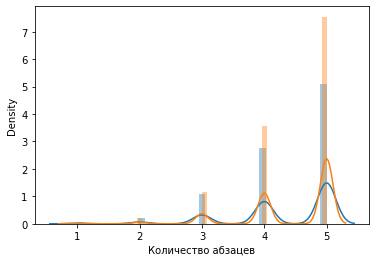

In [19]:
sns.distplot(data_user_replics[data_user_replics['label'] == 1]['Количество абзацев'])
sns.distplot(data_user_replics[data_user_replics['label'] == 0]['Количество абзацев'])

In [50]:
data_user_replics.groupby('label')['TTR'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22783.0,0.832379,0.153721,0.00,0.75,0.860,0.95,1.0
1,6118.0,0.851486,0.154107,0.09,0.78,0.885,1.00,1.0


/home/nanosemantics/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nanosemantics/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TTR', ylabel='Density'>

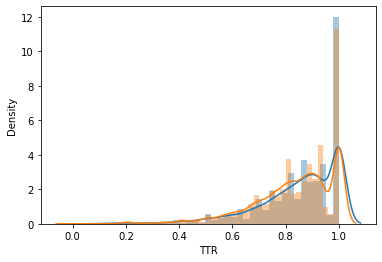

In [49]:
sns.distplot(data_user_replics[data_user_replics['label'] == 1]['TTR'])
sns.distplot(data_user_replics[data_user_replics['label'] == 0]['TTR'])

In [54]:
user_replics_cols = ['TTR', 'Количество абзацев', 'Количество слогов', 'Количество слов']

In [3]:
data_user_replics.corr()['label'].sort_values()

Количество абзацев                        -0.058027
Количество слогов                         -0.050346
Количество слов                           -0.050055
Количество предложений                    -0.039950
Местоимений                               -0.039451
Среднее количество слов в предложении     -0.036576
Ср. количество слов в предложении         -0.036571
Существительных                           -0.036492
Глаголов                                  -0.034546
Именительный падеж (СУЩ)                  -0.029548
Настоящее время (ГЛ)                      -0.026646
Global noun overlap                       -0.023674
Global argument overlap                   -0.023674
Local noun overlap                        -0.022570
Local argument overlap                    -0.022570
Винительный падеж (СУЩ)                   -0.022402
Будущее время (ГЛ)                        -0.021988
Средний ранг                              -0.020453
Родительный падеж (СУЩ)                   -0.018541
Прилагательн

In [39]:
phrase_cols = ['Среднее количество слов в предложении', 'Существительных', 'Количество слогов', 'RR']

In [4]:
data_phrase.corr()['label'].sort_values()

Среднее количество слов в предложении     -0.127031
Ср. количество слов в предложении         -0.127031
Существительных                           -0.101317
Количество слогов                         -0.097808
Индекс ФК (мод) SIS                       -0.090858
Индекс ФК (О)                             -0.089546
Количество слов                           -0.087931
Именительный падеж (СУЩ)                  -0.079276
Средняя длина слова в тексте              -0.067283
Винительный падеж (СУЩ)                   -0.065800
Ср. количество слогов в слове             -0.061000
Среднее количество слогов в слове         -0.060987
Глаголов                                  -0.055202
Средний ранг                              -0.046416
Настоящее время (ГЛ)                      -0.042844
Местоимений                               -0.039166
Предложный падеж (СУЩ)                    -0.034799
Прилагательных                            -0.030078
Родительный падеж (СУЩ)                   -0.025204
Наречий     

In [5]:
data_marusia.corr()['label'].sort_values()

Количество абзацев                        -0.053244
Количество слов                           -0.033643
Глаголов                                  -0.033014
Винительный падеж (СУЩ)                   -0.030929
Наречий                                   -0.030504
Количество слогов                         -0.030399
Ср. количество слов в предложении         -0.029745
Среднее количество слов в предложении     -0.029744
Будущее время (ГЛ)                        -0.028027
Родительный падеж (СУЩ)                   -0.028002
Прилагательных                            -0.026359
Прошедшее время (ГЛ)                      -0.025479
Существительных                           -0.023916
Местоимений                               -0.019082
Индекс ФК (мод) SIS                       -0.016116
Global argument overlap                   -0.016051
Global noun overlap                       -0.016051
Индекс ФК (О)                             -0.015482
Настоящее время (ГЛ)                      -0.015040
Количество п

In [51]:
csv_data = pd.read_csv('punc_train.tsv', sep='\t', header=0)

In [59]:
readability_parse_user_repl = data_user_replics[user_replics_cols]

In [62]:
readability_parse_user_repl.columns = [column + ' контекста юзера' for column in readability_parse_user_repl.columns]

In [63]:
readability_parse_phrase = data_phrase[phrase_cols]

In [70]:
list(readability_parse_user_repl.columns) + list(readability_parse_phrase.columns)

['TTR контекста юзера',
 'Количество абзацев контекста юзера',
 'Количество слогов контекста юзера',
 'Количество слов контекста юзера',
 'Среднее количество слов в предложении таргетной фразы',
 'Существительных таргетной фразы',
 'Количество слогов таргетной фразы',
 'RR таргетной фразы']

In [64]:
readability_parse_phrase.columns = [column + ' таргетной фразы' for column in readability_parse_phrase.columns]

In [66]:
merged_data = pd.merge(csv_data.reset_index(), readability_parse_user_repl.reset_index(), on='index')
merged_data = pd.merge(merged_data, readability_parse_phrase.reset_index(), on='index')

In [67]:
merged_data

,index,phrase,context,label,punc_phrase,punc_context,TTR контекста юзера,Количество абзацев контекста юзера,Количество слогов контекста юзера,Количество слов контекста юзера,Среднее количество слов в предложении таргетной фразы,Существительных таргетной фразы,Количество слогов таргетной фразы,RR таргетной фразы
0,0,ну куда пошли,"[{'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}]",1,"Ну, куда пошли?","[{'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}, {'user': '', 'marusia': ''}]",1.00,1.0,4.0,2.0,3.0,0.0,5.0,0.33
1,1,а сколько будет миллиард долларов рублей,"[{'user': 'а сколько будет', 'marusia': 'Извините, я не расслышала, что посчитать?'}, {'user': 'а сколько будет lamborghini urus самый дорогой в мире на планете', 'marusia': ' Lamborghini Urus — самый быстрый внедорожник в мире - Техническая планета: Ориентировочная стоимость Lamborghini Urus - от 15,2 млн рублей.'}, {'user': 'а сколько будет mercedes dexp tesla mondox рублей', 'marusia': ' Стали известны цены на новый кроссовер Mercedes-Benz GLC для российского рынка - Tvoe-avto.com: Эта же комплектация, но в ""Особой серии"" будет стоить 2 миллиона 690 тысяч рублей.'}, {'user': 'а скажи ка...",0,А сколько будет миллиард долларов рублей?,"[{'user': 'А сколько будет?', 'marusia': 'Извините, я не расслышала, что посчитать?'}, {'user': 'А сколько будет Lamborghini Urus, самый дорогой в мире, на планете?', 'marusia': ' Lamborghini Urus — самый быстрый внедорожник в мире - Техническая планета: Ориентировочная стоимость Lamborghini Urus - от 15,2 млн рублей.'}, {'user': 'А сколько будет Mercedes Dexp Tesla Mondox рублей?', 'marusia': ' Стали известны цены на новый кроссовер Mercedes-Benz GLC для российского рынка - Tvoe-avto.com: Эта же комплектация, но в ""Особой серии"" будет стоить 2 миллиона 690 тысяч рублей.'}, {'user': 'А ска...",0.65,5.0,55.0,37.0,6.0,3.0,13.0,0.17
2,2,марусь включи пожалуйста елена вальяк гипноз для сна,"[{'user': 'маруся через десять минут будильник включи', 'marusia': 'Окей, разбужу вас через 10 минут'}, {'user': 'тормози', 'marusia': ''}, {'user': 'будильник на три часа ночи', 'marusia': 'Окей, разбужу вас через 1 час 30 минут'}, {'user': '', 'marusia': ' [Доброй ночи, Алексей!] | [date: Воскресенье, 9 октября] | [temp: 12] | [ Погода {Погода в выходные}, Давай сыграем в города {Давай сыграем в города}, Радио {Поставь Радио Энерджи}, Таймер {Таймер на 30 секунд}]'}, {'user': 'привет', 'marusia': 'Привет, Алексей!'}]",0,"Марусь включи, пожалуйста, Елена Вальяк. Гипноз для сна.","[{'user': 'Маруся, через десять минут будильник включи.', 'marusia': 'Окей, разбужу вас через 10 минут'}, {'user': 'Тормози.', 'marusia': ''}, {'user': 'Будильник на три часа ночи.', 'marusia': 'Окей, разбужу вас через 1 час 30 минут'}, {'user': '', 'marusia': ' [Доброй ночи, Алексей!] | [date: Воскресенье, 9 октября] | [temp: 12] | [ Погода {Погода в выходные}, Давай сыграем в города {Давай сыграем в города}, Радио {Поставь Радио Энерджи}, Таймер {Таймер на 30 секунд}]'}, {'user': 'Привет.', 'marusia': 'Привет, Алексей!'}]",1.00,4.0,28.0,13.0,4.0,5.0,17.0,0.12
3,3,да о том что я тебя очень уважаю люблю,"[{'user': '', 'marusia': 'Если вам нужна помощь, я к вашим услугам. Спросите меня, например: «Сколько букв в самом длинном алфавите?».'}, {'user': 'молодец спасибо', 'marusia': 'А вам спасибо, что вы так внимательны ко мне!'}, {'user': '', 'marusia': 'Не удивляйтесь — с вами говорит Маруся, голосовой помощник. Я умная и милая, живу внутри этой симпатичной колоночки. Спросите меня: «Маруся, что ты умеешь»'}, {'user': '', 'marusia': 'Не проходите мимо. С вами говорит Маруся. Самый дружелюбный голосовой помощник на свете. Чтобы поболтать со мной, спросите меня: «Маруся, как дела?»'}, {'user':...",0,"Да, о том, что я тебя очень уважаю, люблю.","[{'user': '', 'marusia': 'Если вам нужна помощь, я к вашим услугам. Спросите м